In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [24]:
# carrega ocorrencias registradas

ocorrencias = pd.read_csv('https://raw.githubusercontent.com/snowd4ng3r/data-analysis-project/master/ocorrencia_1_Semestre_2013.csv', sep=';')
ocorrencias = ocorrencias.drop(columns=['ocosentido', 'ococomid', 'ocoidorigem', 'ocodatafim'])
ocorrencias.columns = ['ocorrencia_id', 'local_br_ocorrencia', 'status_ocorrencia', 'municipio_ocorrencia', 'data_ocorrencia', 'data_registro_ocorrencia', 'tipo_ocorrencia']

# carrega ocorrencias de acidentes

ocorrencias_acidentes = pd.read_csv('https://raw.githubusercontent.com/snowd4ng3r/data-analysis-project/master/ocorrenciaacidente_1_Semestre_2013.csv', sep=';', encoding='latin-1')

ocorrencias_acidentes = ocorrencias_acidentes.drop(columns=['oacdano', 'oacdanoterc',
       'oacdanoamb', 'oaclatitude', 'oaclongitude', 'oacdistab', 'oacdistac',
       'oacdistbc', 'oacmodelopista', 'oacsentido1', 'oacsentido2',
       'oacqtdfaixa1', 'oacqtdfaixa2', 'oacacostamento1', 'oacacostamento2',
       'oaccanteiro', 'oaclinhacentral', 'oacorientpista', 'oacgirafundo',
       'oacversaocroqui', 'oacsitio'])

ocorrencias_acidentes.columns = ['ocorrencia_acidente_id', 'tipo_acidente', 'causa_acidente']

# carrega tipos de acidentes

tipos_acidentes = pd.read_csv('https://raw.githubusercontent.com/snowd4ng3r/data-analysis-project/master/tipoAcidente.csv', sep=';', encoding='latin-1')
tipos_acidentes = tipos_acidentes.drop(columns=['ttaatualiza', 'ttarelacidente', 'ttaativo'])
tipos_acidentes.columns = ['tipo_acidente_id', 'descricao_acidente']

# carrega locais

locais = pd.read_csv('https://raw.githubusercontent.com/snowd4ng3r/data-analysis-project/master/localbrEditado.csv', sep=';')
locais = locais.drop(columns=['lbrpnvid', 'lbratualiza'])
locais.columns = ['local_id', 'estado_ocorrencia', 'br_ocorrencia', 'km_ocorrencia']

# carrega causas de acidentes

causas_acidentes = pd.read_csv('https://raw.githubusercontent.com/snowd4ng3r/data-analysis-project/master/causaacidente.csv', sep=';', encoding='latin-1')
causas_acidentes.columns = ['causa_acidente_id', 'causa_acidente_descricao']

# carrega municípios
municipios_acidentes = pd.read_csv('https://raw.githubusercontent.com/snowd4ng3r/data-analysis-project/master/municipio.csv', sep=';')
municipios_acidentes.columns = ['municipio_id', 'municipio_nome', 'municipio_uf']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'Rodovia da ocorrência')

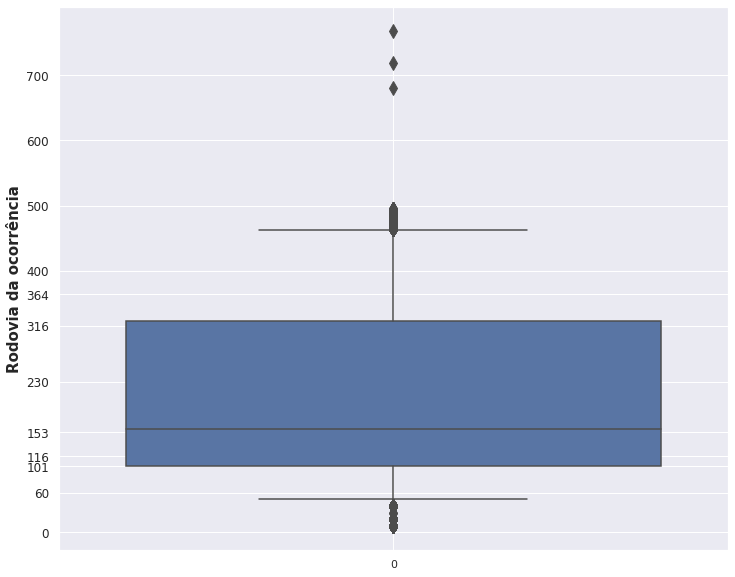

In [25]:
rel_ocorrencias_ocorrenciasAcidentes = pd.merge(ocorrencias, ocorrencias_acidentes, how='inner', left_on=['ocorrencia_id'], right_on=['ocorrencia_acidente_id'])
rel_ocorrencias_localBr = pd.merge(rel_ocorrencias_ocorrenciasAcidentes, locais, how='left', left_on=['local_br_ocorrencia'], right_on=['local_id'])

fig, ax = plt.subplots(figsize=(12, 10))
sns.set_theme(style='darkgrid')
sns.boxplot(data=rel_ocorrencias_localBr.br_ocorrencia, ax=ax, fliersize=10, whis=[7, 96])

plt.grid(axis='x', alpha=2.0)
plt.yticks([0, 60, 101, 116, 153, 230, 316, 364, 400, 500, 600, 700], size=12)
plt.ylabel('Rodovia da ocorrência', size=15, fontweight='bold')

In [26]:
def truncate(number, decimals=0):
    if not isinstance(decimals, int):
        raise TypeError("Casas decimais devem ser um número inteiro")
    elif decimals < 0:
        raise ValueError("Casas decimais devem ser maiores que zero")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor)/factor

rel_ocorrencias_localBr = pd.merge(rel_ocorrencias_ocorrenciasAcidentes, locais, how='left', left_on=['local_br_ocorrencia'], right_on=['local_id'])

numero_ocorrencias_por_estado = rel_ocorrencias_localBr.groupby('estado_ocorrencia').count()
desvio_padrao = rel_ocorrencias_localBr.groupby('estado_ocorrencia').std()/100000
rel_ocorrencias_localBr = rel_ocorrencias_localBr['ocorrencia_id'].count()/rel_ocorrencias_localBr.groupby('estado_ocorrencia').count()

rel_ocorrencias_localBr['media_por_estado'] = rel_ocorrencias_localBr.apply(lambda value: truncate(value['ocorrencia_id'], 3), axis=1)
rel_ocorrencias_localBr['numero_ocorrencias_por_estado'] = numero_ocorrencias_por_estado['ocorrencia_id']
rel_ocorrencias_localBr['desvio_padrao'] = desvio_padrao['ocorrencia_id']

rel_ocorrencias_localBr = rel_ocorrencias_localBr.filter(['estado_ocorrencia', 'numero_ocorrencias_por_estado', 'media_por_estado', 'desvio_padrao'])
rel_ocorrencias_localBr

,numero_ocorrencias_por_estado,media_por_estado,desvio_padrao
estado_ocorrencia,,,
AC,207,442.879,0.271022
AL,1197,76.588,0.269241
AM,124,739.322,0.300337
AP,131,699.816,0.275322
BA,5138,17.842,0.278925
CE,1982,46.254,0.274074
DF,801,114.451,0.265099
ES,4093,22.398,0.273424
GO,3908,23.458,0.271362


Text(0, 0.5, 'Nº de Ocorrências')

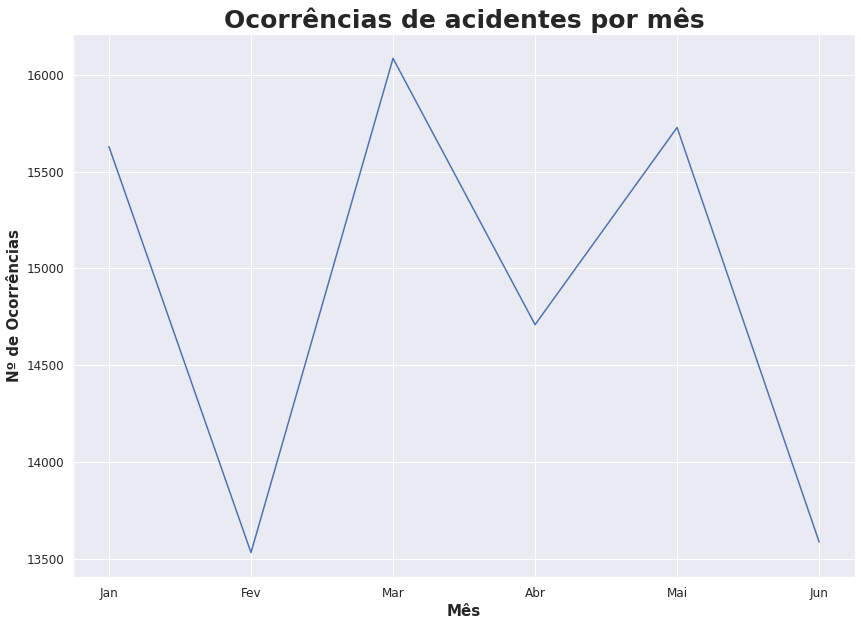

In [27]:
rel_ocorrencias_ocorrenciasAcidentes = pd.merge(ocorrencias, ocorrencias_acidentes, how='inner', left_on=['ocorrencia_id'], right_on=['ocorrencia_acidente_id'])
rel_ocorrencias_ocorrenciasAcidentes['data_ocorrencia'] = rel_ocorrencias_ocorrenciasAcidentes['data_ocorrencia'].astype('datetime64')

rel_ocorrencias_ocorrenciasAcidentes['mes_ocorrencia'] = rel_ocorrencias_ocorrenciasAcidentes['data_ocorrencia'].map(lambda value: value.month)
rel_ocorrencias_ocorrenciasAcidentes = rel_ocorrencias_ocorrenciasAcidentes.filter(['ocorrencia_id', 'mes_ocorrencia']).where(rel_ocorrencias_ocorrenciasAcidentes['mes_ocorrencia'] <= 6)
rel_ocorrencias_ocorrenciasAcidentes = rel_ocorrencias_ocorrenciasAcidentes.groupby(['mes_ocorrencia']).count()

fig, ax = plt.subplots(figsize=(14, 10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=rel_ocorrencias_ocorrenciasAcidentes.ocorrencia_id, ax=ax)

plt.grid(axis='x', alpha=2.0)
plt.title('Ocorrências de acidentes por mês', size=25, fontweight='bold')

plt.xticks([1, 2, 3, 4, 5, 6], ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'], size=12)
plt.yticks(size=12)

plt.xlabel('Mês', size=15, fontweight='bold')
plt.ylabel('Nº de Ocorrências', size=15, fontweight='bold')

Text(0, 0.5, 'Tipos de acidentes')

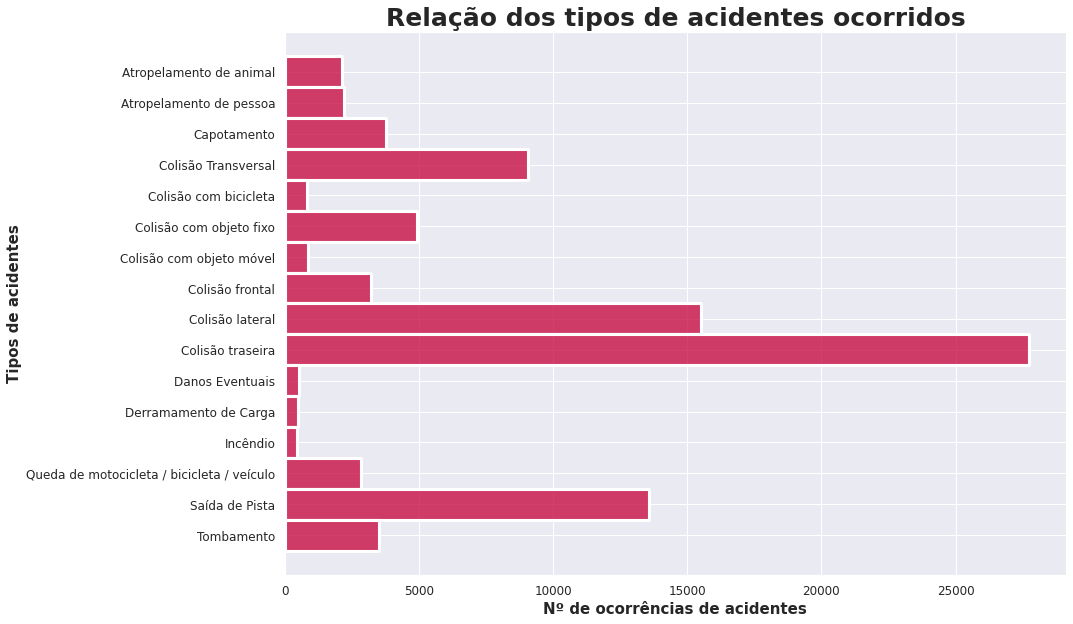

In [28]:
rel_ocorrenciasAcidentes_tiposAcidentes = pd.merge(ocorrencias_acidentes, tipos_acidentes, how='left', left_on=['tipo_acidente'], right_on=['tipo_acidente_id'])
rel_ocorrenciasAcidentes_tiposAcidentes = rel_ocorrenciasAcidentes_tiposAcidentes.filter(items=['ocorrencia_acidente_id', 'tipo_acidente', 'descricao_acidente'])
rel_ocorrenciasAcidentes_tiposAcidentes = rel_ocorrenciasAcidentes_tiposAcidentes.sort_values(by=['descricao_acidente'])

fig, ax = plt.subplots(figsize=(14, 10))
sns.set_style('darkgrid')
sns.histplot(y=rel_ocorrenciasAcidentes_tiposAcidentes['descricao_acidente'], ax=ax, color='#C70039')

plt.grid(axis='x', alpha=1.0)
plt.title('Relação dos tipos de acidentes ocorridos', size=25, fontweight='bold')

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel('Nº de ocorrências de acidentes', size=15, fontweight='bold')
plt.ylabel('Tipos de acidentes', size=15, fontweight='bold')

In [29]:
rel_ocorrenciasAcidentes_tiposAcidentes = pd.merge(ocorrencias_acidentes, tipos_acidentes, how='left', left_on=['tipo_acidente'], right_on=['tipo_acidente_id'])
rel_ocorrenciasAcidentes_causasAcidentes = pd.merge(rel_ocorrenciasAcidentes_tiposAcidentes, causas_acidentes, how='left', left_on=['causa_acidente'], right_on=['causa_acidente_id'])

rel_ocorrenciasAcidentes_causasAcidentes = rel_ocorrenciasAcidentes_causasAcidentes.where(rel_ocorrenciasAcidentes_causasAcidentes['descricao_acidente'] == 'Colisão traseira')\
                                                                                    .groupby(['descricao_acidente', 'causa_acidente_descricao']).count()

rel_ocorrenciasAcidentes_causasAcidentes = rel_ocorrenciasAcidentes_causasAcidentes.filter(['descricao_acidente', 'causa_acidente_descricao', 'ocorrencia_acidente_id'])
rel_ocorrenciasAcidentes_causasAcidentes.columns = ['numero_ocorrencias']

rel_ocorrenciasAcidentes_causasAcidentes

numero_ocorrencias
descricao_acidente causa_acidente_descricao                              
Colisão traseira   Animais na Pista                                    96
                   Defeito mecânico em veículo                        472
                   Defeito na via                                     150
                   Desobediência à sinalização                        348
                   Dormindo                                           354
                   Falta de atenção                                 11262
                   Ingestão de álcool                                 762
                   Não guardar distância de segurança                9047
                   Outras                                            3922
                   Ultrapassagem indevida                             162
                   Velocidade incompatível                           1155